<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Amsterdam-Airbnb-locations-characterization" data-toc-modified-id="1.-Amsterdam-Airbnb-locations-characterization-0">1. Amsterdam Airbnb locations characterization</a></span><ul class="toc-item"><li><span><a href="#1.1.-Listings-exploratory-analysis" data-toc-modified-id="1.1.-Listings-exploratory-analysis-0.1">1.1. Listings exploratory analysis</a></span><ul class="toc-item"><li><span><a href="#1.1.1.-Number-of-locations-per-date" data-toc-modified-id="1.1.1.-Number-of-locations-per-date-0.1.1">1.1.1. Number of locations per date</a></span></li><li><span><a href="#1.1.2.-Locations-per-district" data-toc-modified-id="1.1.2.-Locations-per-district-0.1.2">1.1.2. Locations per district</a></span></li><li><span><a href="#1.1.2.-Price-per-date" data-toc-modified-id="1.1.2.-Price-per-date-0.1.3">1.1.2. Price per date</a></span></li></ul></li><li><span><a href="#1.2.-Add-descriptors-to-listings" data-toc-modified-id="1.2.-Add-descriptors-to-listings-0.2">1.2. Add descriptors to listings</a></span></li></ul></li><li><span><a href="#2.-calendar" data-toc-modified-id="2.-calendar-1">2. calendar</a></span></li><li><span><a href="#3.-reviews" data-toc-modified-id="3.-reviews-2">3. reviews</a></span></li></ul></div>

# Exploratory analysis

## 1. Amsterdam Airbnb locations characterization

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
all_dates_listings = pd.read_csv("../data/clean_data/all_dates_listings.csv")

In [79]:
#Every date has one entry per listing
all_dates_listings.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Date,District_code,District
0,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,49.56,3,248,2018-11-28,2.10,1,44,December 2018,M,Oost
1,1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,134.40,4,42,2018-08-29,1.03,1,47,December 2018,E,West
2,2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,67.20,1,233,2018-11-30,2.18,2,198,December 2018,A,Centrum
3,3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,105.00,14,1,2018-01-21,0.09,2,141,December 2018,A,Centrum
4,4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,126.00,2,171,2018-11-25,2.03,1,199,December 2018,A,Centrum


In [80]:
all_dates_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77181 entries, 0 to 77180
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      77181 non-null  int64  
 1   id                              77181 non-null  int64  
 2   name                            77042 non-null  object 
 3   host_id                         77181 non-null  int64  
 4   host_name                       76517 non-null  object 
 5   neighbourhood                   77181 non-null  object 
 6   latitude                        77181 non-null  float64
 7   longitude                       77181 non-null  float64
 8   room_type                       77181 non-null  object 
 9   price                           77181 non-null  float64
 10  minimum_nights                  77181 non-null  int64  
 11  number_of_reviews               77181 non-null  int64  
 12  last_review                     

In [81]:
all_dates_listings.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Date',
       'District_code', 'District'],
      dtype='object')

In [82]:
## I am just gonna keep the information I am gonna work with
listings= all_dates_listings[['id','neighbourhood','latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
                   'number_of_reviews','reviews_per_month','calculated_host_listings_count', 
                   'availability_365', 'Date','District_code','District' ]]

In [83]:
listings.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Date,District_code,District
0,2818,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,49.56,3,248,2.10,1,44,December 2018,M,Oost
1,3209,Westerpark,52.390225,4.873924,Entire home/apt,134.40,4,42,1.03,1,47,December 2018,E,West
2,20168,Centrum-Oost,52.365087,4.893541,Entire home/apt,67.20,1,233,2.18,2,198,December 2018,A,Centrum
3,25428,Centrum-West,52.373114,4.883668,Entire home/apt,105.00,14,1,0.09,2,141,December 2018,A,Centrum
4,27886,Centrum-West,52.386727,4.892078,Private room,126.00,2,171,2.03,1,199,December 2018,A,Centrum


### 1.1. Listings exploratory analysis

In [65]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77181 entries, 0 to 77180
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              77181 non-null  int64  
 1   neighbourhood                   77181 non-null  object 
 2   latitude                        77181 non-null  float64
 3   longitude                       77181 non-null  float64
 4   room_type                       77181 non-null  object 
 5   price                           77181 non-null  float64
 6   minimum_nights                  77181 non-null  int64  
 7   number_of_reviews               77181 non-null  int64  
 8   reviews_per_month               67486 non-null  float64
 9   calculated_host_listings_count  77181 non-null  int64  
 10  availability_365                77181 non-null  int64  
 11  Date                            77181 non-null  object 
 12  District_code                   

#### 1.1.1. Number of locations per date

In [66]:
num_loc_x_date = listings["Date"].value_counts()
num_loc_x_date 

December 2018    20350
April 2020       19743
December 2020    18899
April 2021       18189
Name: Date, dtype: int64

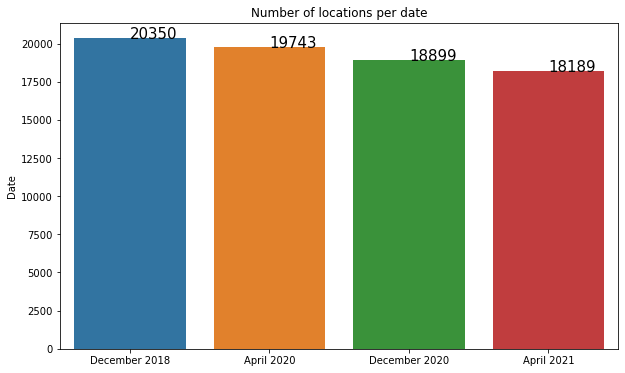

In [67]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
sns.barplot(x= num_loc_x_date.index,y=num_loc_x_date)
plt.title("Number of locations per date")

for index,data in enumerate(num_loc_x_date.values):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=15))
    
plt.show()

#plt.text() , you need to give (x,y) location , where you want to put the numbers,
#So here index will give you x pos and data+1 will provide a little gap in y axis.


In [68]:
#There were more locations 
num_loc_x_date.values

array([20350, 19743, 18899, 18189])

#### 1.1.2. Locations per district

In [69]:
num_loc_x_district =listings.groupby(["Date"])["District_name"].value_counts()
num_loc_x_district

KeyError: 'Column not found: District_name'

#### 1.1.2. Price per date

In [19]:
listing_descriptors.groupby(["Date"])["price"].mean()

Date
April 2020       138.671478
April 2021       129.288418
December 2018    127.409384
December 2020    128.937311
Name: price, dtype: float64

In [ ]:
#hot encoding

In [ ]:
#Are all the means equal? A computation called ANOVA (analysis of variance) answers this question.
#If ANOVA shows that the means aren’t all equal, then which means are unequal, and by how much?
#There are many ways to answer this question (and they give different answers), but we’ll use
#a process called Tukey’s HSD (Honestly Significant Difference).


KeyboardInterrupt: 

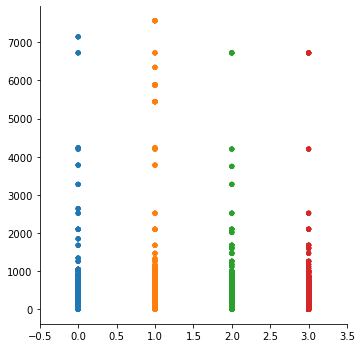

In [21]:
##violin data

sns.catplot(data=listing_descriptors, kind="swarm", x="Date", y="price")

### 1.2. Add descriptors to listings

In [ ]:
district_descriptors = pd.read_csv("../data/clean_data/district_descriptors.csv")
district_descriptors = district_descriptors.iloc[:,1:]
district_descriptors 

In [ ]:
#listing_descriptors = listings.merge(district_descriptors, left_on='District_code', right_on='District_code',how="left")

## 2. calendar

In [39]:
calendar_cor = pd.read_csv("../data/clean_data/calendar_0320_0721.csv")

In [ ]:
calendar_pre_cor = pd.read_csv("../data/clean_data/calendar_1218_1219.csv)

## 3. reviews

In [ ]:
reviews = pd.read_csv("../data/clean_data/reviews.csv")